In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Loading datasets and preprocessing

In [ ]:
# prompt: import Sleep_Efficiency.csv as a df
# used AI to help import csv files on google colab

url_eff = 'https://raw.githubusercontent.com/fiona1nicdao/DataMiningProject/refs/heads/main/Sleep_Efficiency.csv'
df_eff = pd.read_csv(url_eff)
# df_eff = pd.read_csv('/content/Sleep_Efficiency.csv')
# print(df_eff.head(5))

url_health = 'https://raw.githubusercontent.com/fiona1nicdao/DataMiningProject/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv'
df_health = pd.read_csv(url_health)
# df_health = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
# print(df_health.head(5))

url_cycle = 'https://raw.githubusercontent.com/fiona1nicdao/DataMiningProject/refs/heads/main/sleep_cycle_productivity.csv'
df_cycle = pd.read_csv(url_cycle)
# df_cycle = pd.read_csv('/content/sleep_cycle_productivity.csv')
# print(df_cycle.head(5))

url_depr = 'https://raw.githubusercontent.com/fiona1nicdao/DataMiningProject/refs/heads/main/sleep_deprivation_dataset_detailed.csv'
df_depr = pd.read_csv(url_depr)
# df_depr = pd.read_csv('/content/sleep_deprivation_dataset_detailed.csv')
# print(df_depr.head(5))

## Removing underage "samples"

In [ ]:
#remove underage items from sleep efficiency dataset
index_drop_under18 = df_eff[df_eff['Age'] < 18 ].index
df_eff = df_eff.drop(index_drop_under18)
# print(df_eff.head(10))

#drop null values from all data sets
df_eff = df_eff.dropna()
df_health = df_health.dropna()
df_cycle = df_cycle.dropna()
df_depr = df_depr.dropna()

## Dataset Shape Analysis
Count of number items (people) in each dataset (the number of rows)

Findings: Sleep cycle dataset is largest, with 5000 samples

In [ ]:
# Sleep_Efficiency.csv
print(df_eff.shape)
# Sleep_health_and_lifestyle_dataset.csv'
print(df_health.shape)
# sleep_cycle_productivity.csv
print(df_cycle.shape)
# sleep_deprivation_dataset_detailed.csv
print(df_depr.shape)

#before dropping null values sizes of datasets:
# (443, 15)
# (374, 13)
# (5000, 15)
# (60, 14)

(379, 15)
(155, 13)
(5000, 15)
(60, 14)


# Creating combined dataset with all four datasets

In [ ]:
# make a dataframe that combines all the ages
age1 = df_eff['Age'].tolist()
age2 = df_health['Age'].tolist()
age3 = df_cycle['Age'].tolist()
age4 = df_depr['Age'].tolist()
data = age1 + age2 + age3 + age4
data = {'Age':data}
df_age = pd.DataFrame(data)
print(len(df_age))
# print(df_age)


5594


In [ ]:
# add gender to all the df_age
gender1 = df_eff['Gender'].tolist()
gender2 = df_health['Gender'].tolist()
gender3 = df_cycle['Gender'].tolist()
gender4 = df_depr['Gender'].tolist()
data = gender1 + gender2 + gender3 + gender4
df_age['Gender'] = data
# print(df_age.columns)
print(df_age)

      Age  Gender
0      65  Female
1      69    Male
2      40  Female
3      40  Female
4      57    Male
...   ...     ...
5589   34    Male
5590   24  Female
5591   41    Male
5592   40  Female
5593   22    Male

[5594 rows x 2 columns]


In [ ]:
# add sleep duration
duration1 = df_eff['Sleep duration'].tolist()
duration2 = df_health['Sleep Duration'].tolist()
duration3 = df_cycle['Total Sleep Hours'].tolist()
duration4 = df_depr['Sleep_Hours'].tolist()
data = duration1 + duration2 + duration3 + duration4
df_age['Sleep Duration'] = data
print(df_age.columns)
print(df_age)

Index(['Age', 'Gender', 'Sleep Duration'], dtype='object')
      Age  Gender  Sleep Duration
0      65  Female            6.00
1      69    Male            7.00
2      40  Female            8.00
3      40  Female            6.00
4      57    Male            8.00
...   ...     ...             ...
5589   34    Male            8.53
5590   24  Female            3.53
5591   41    Male            4.18
5592   40  Female            3.27
5593   22    Male            4.95

[5594 rows x 3 columns]


## Creating Age Group Attribute

In [ ]:
# make a column for age groups
# 0 = 18-24
# 1 = 25-35
# 2 = 36-44
# 3 = 45-55
# 4 = 56-64
# 5 = 65 - 100
age_groups = []
for i in range(len(df_age)):
  if df_age['Age'][i] >= 18 and df_age['Age'][i] <= 24:
    age_groups.append(0)
  elif df_age['Age'][i] >= 25 and df_age['Age'][i] <= 35:
    age_groups.append(1)
  elif df_age['Age'][i] >= 36 and df_age['Age'][i] <= 44:
   age_groups.append(2)
  elif df_age['Age'][i] >= 45 and df_age['Age'][i] <= 55:
   age_groups.append(3)
  elif  df_age['Age'][i] >= 56 and df_age['Age'][i] <= 64:
   age_groups.append(4)
  else:
   age_groups.append(5)

#new column : Age Group
df_age['Age Group'] = age_groups
print(df_age)
# print(len(age_groups))

      Age  Gender  Sleep Duration  Age Group
0      65  Female            6.00          5
1      69    Male            7.00          5
2      40  Female            8.00          2
3      40  Female            6.00          2
4      57    Male            8.00          4
...   ...     ...             ...        ...
5589   34    Male            8.53          1
5590   24  Female            3.53          0
5591   41    Male            4.18          2
5592   40  Female            3.27          2
5593   22    Male            4.95          0

[5594 rows x 4 columns]


# Analysis of Combined Data Frame df_age

## Histogram of Age Distribution for combined data frame df_age

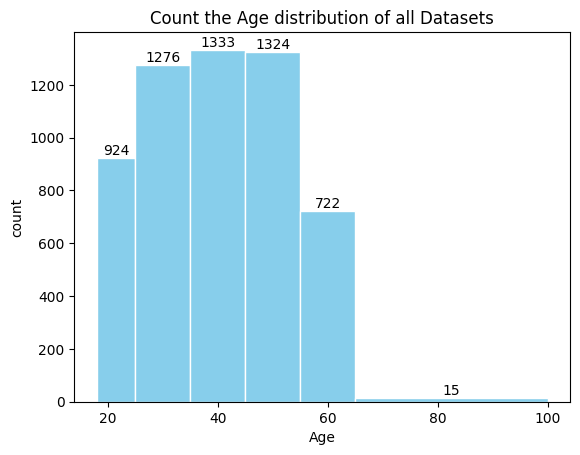

In [ ]:
#histogram of age distribution
# 18 -24 : young adults
# 25-35 : adults
# 36 -44 : mid-age adults
# 45 -55 : older adults
# 56-65 : even older adults
# 65 - 100 : adults older than 65
my_bins = [18,25,35,45,55,65,100]
# change to the common demographics ?
#  https://www.snapsurveys.com/blog/5-survey-demographic-question-examples/

n, _, patches = plt.hist(df_age['Age'], bins=my_bins,edgecolor = 'white',color='skyblue')
plt.bar_label(patches)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Count the Age distribution of all Datasets')
plt.show()

## Histograms of Age and Gender distribution from each dataset

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'sleep_deprivation_dataset_detailed')]

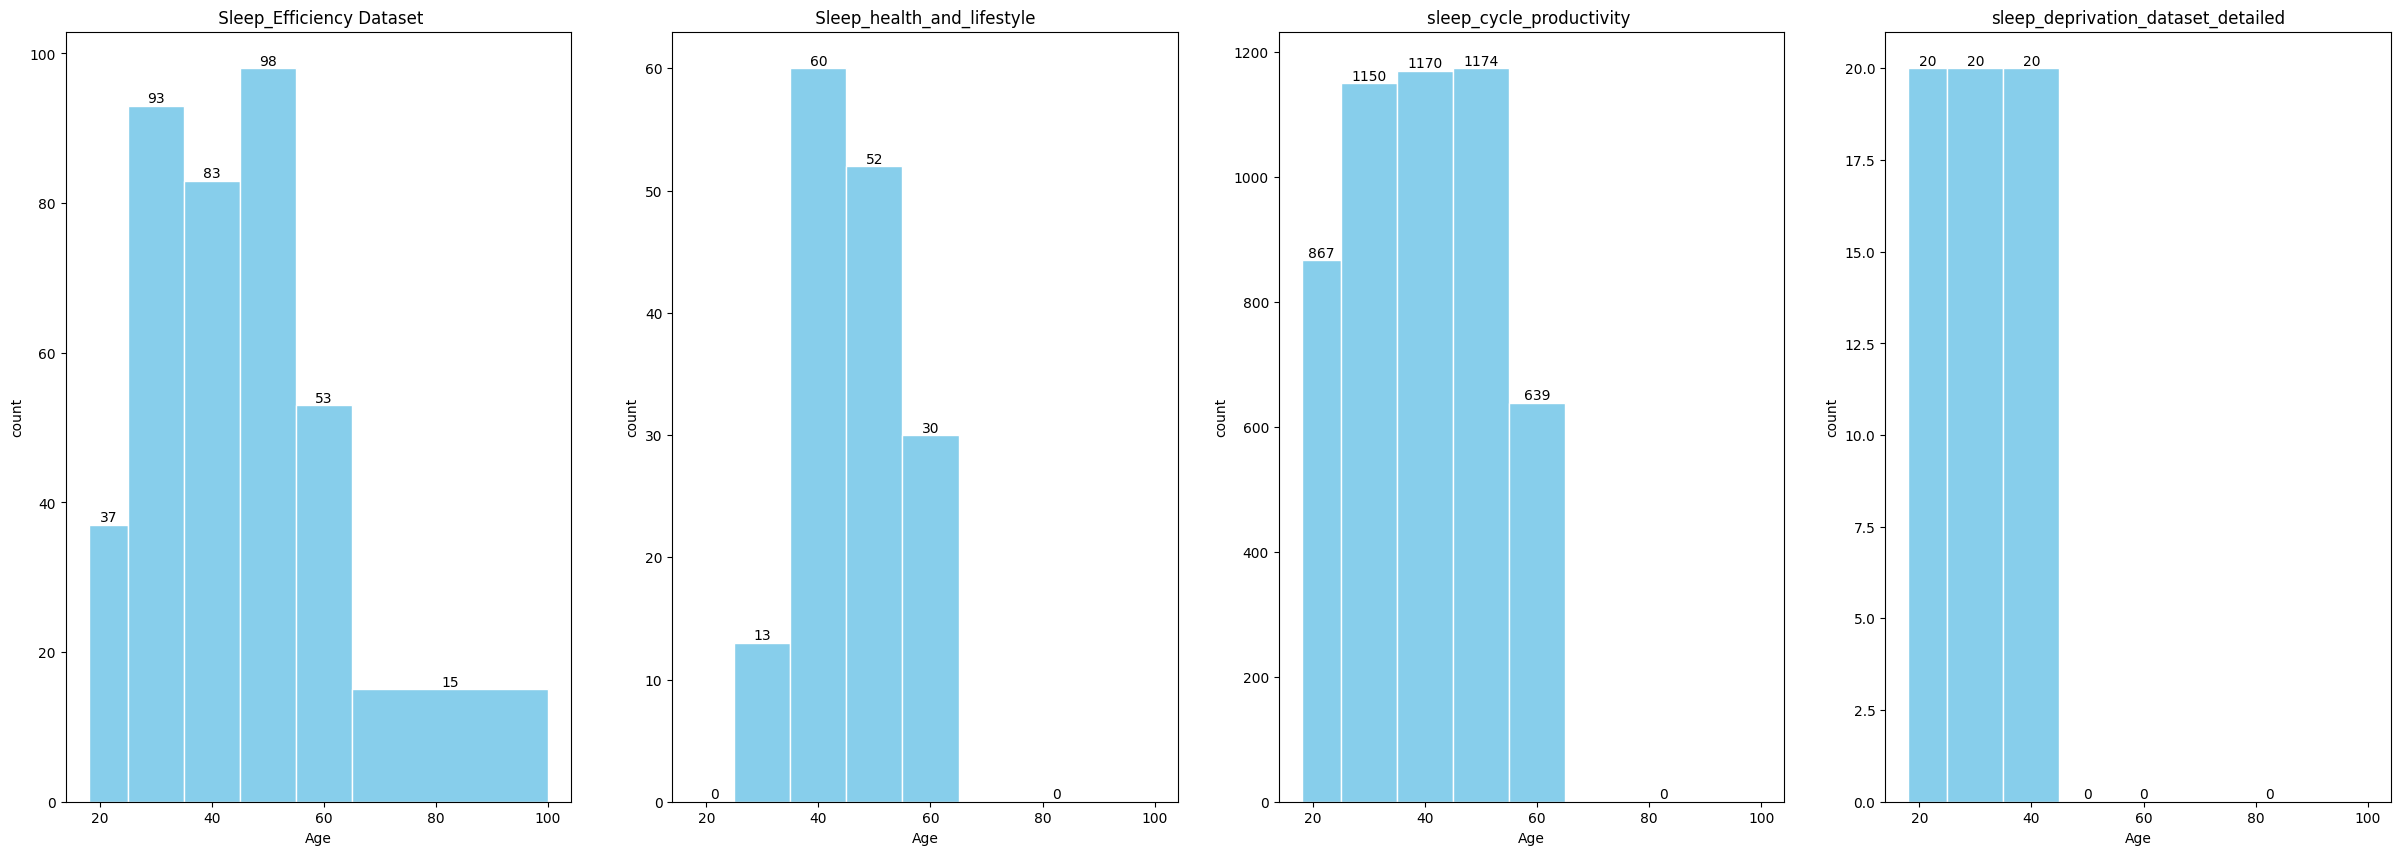

In [ ]:
my_bins = [18,25,35,45,55,65,100]
fig, axs = plt.subplots(figsize=(30,10), ncols=4);
# Sleep_Efficiency.csv
axs[0].hist(df_eff['Age'], bins=my_bins, edgecolor = 'white',color='skyblue')
axs[0].bar_label(axs[0].containers[0], label_type='edge')
axs[0].set(
  xlabel='Age',
  ylabel='count',
  title=' Sleep_Efficiency Dataset'
)

# Sleep_health_and_lifestyle_dataset.csv
axs[1].hist(df_health['Age'], bins=my_bins,edgecolor = 'white',color='skyblue')
axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].set(
  xlabel='Age',
  ylabel='count',
  title=' Sleep_health_and_lifestyle '
)

# sleep_cycle_productivity.csv
axs[2].hist(df_cycle['Age'], bins=my_bins,edgecolor = 'white',color='skyblue')
axs[2].bar_label(axs[2].containers[0], label_type='edge')
axs[2].set(
  xlabel='Age',
  ylabel='count',
  title='sleep_cycle_productivity '
)

# sleep_deprivation_dataset_detailed.csv
axs[3].hist(df_depr['Age'], bins=my_bins,edgecolor = 'white',color='skyblue')
axs[3].bar_label(axs[3].containers[0], label_type='edge')
axs[3].set(
  xlabel='Age',
  ylabel='count',
  title='sleep_deprivation_dataset_detailed'
)
# plt.show()

## Histogram of gender distribution for combined data frame df_age

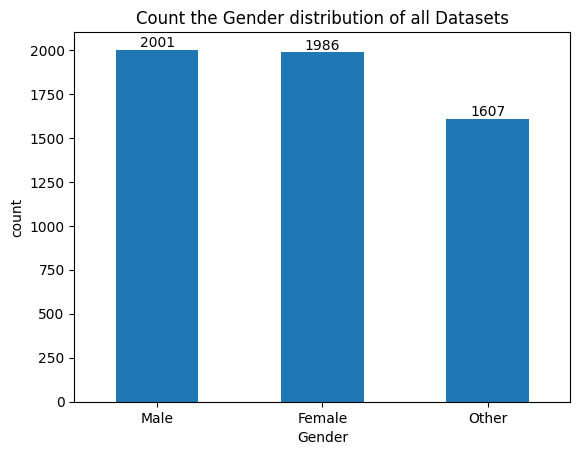

In [ ]:
# histogram of gender distribution

df_age.Gender.value_counts().plot(kind='bar')
ax = plt.gca()
container = ax.containers[0]
plt.bar_label(container, label_type='edge')
# add counts label for each bar
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Count the Gender distribution of all Datasets')
plt.xticks(rotation=0)
plt.show()

## Histogram of gender distribution for each dataset

[Text(0.5, 0, 'gender'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'sleep_deprivation_dataset_detailed Dataset')]

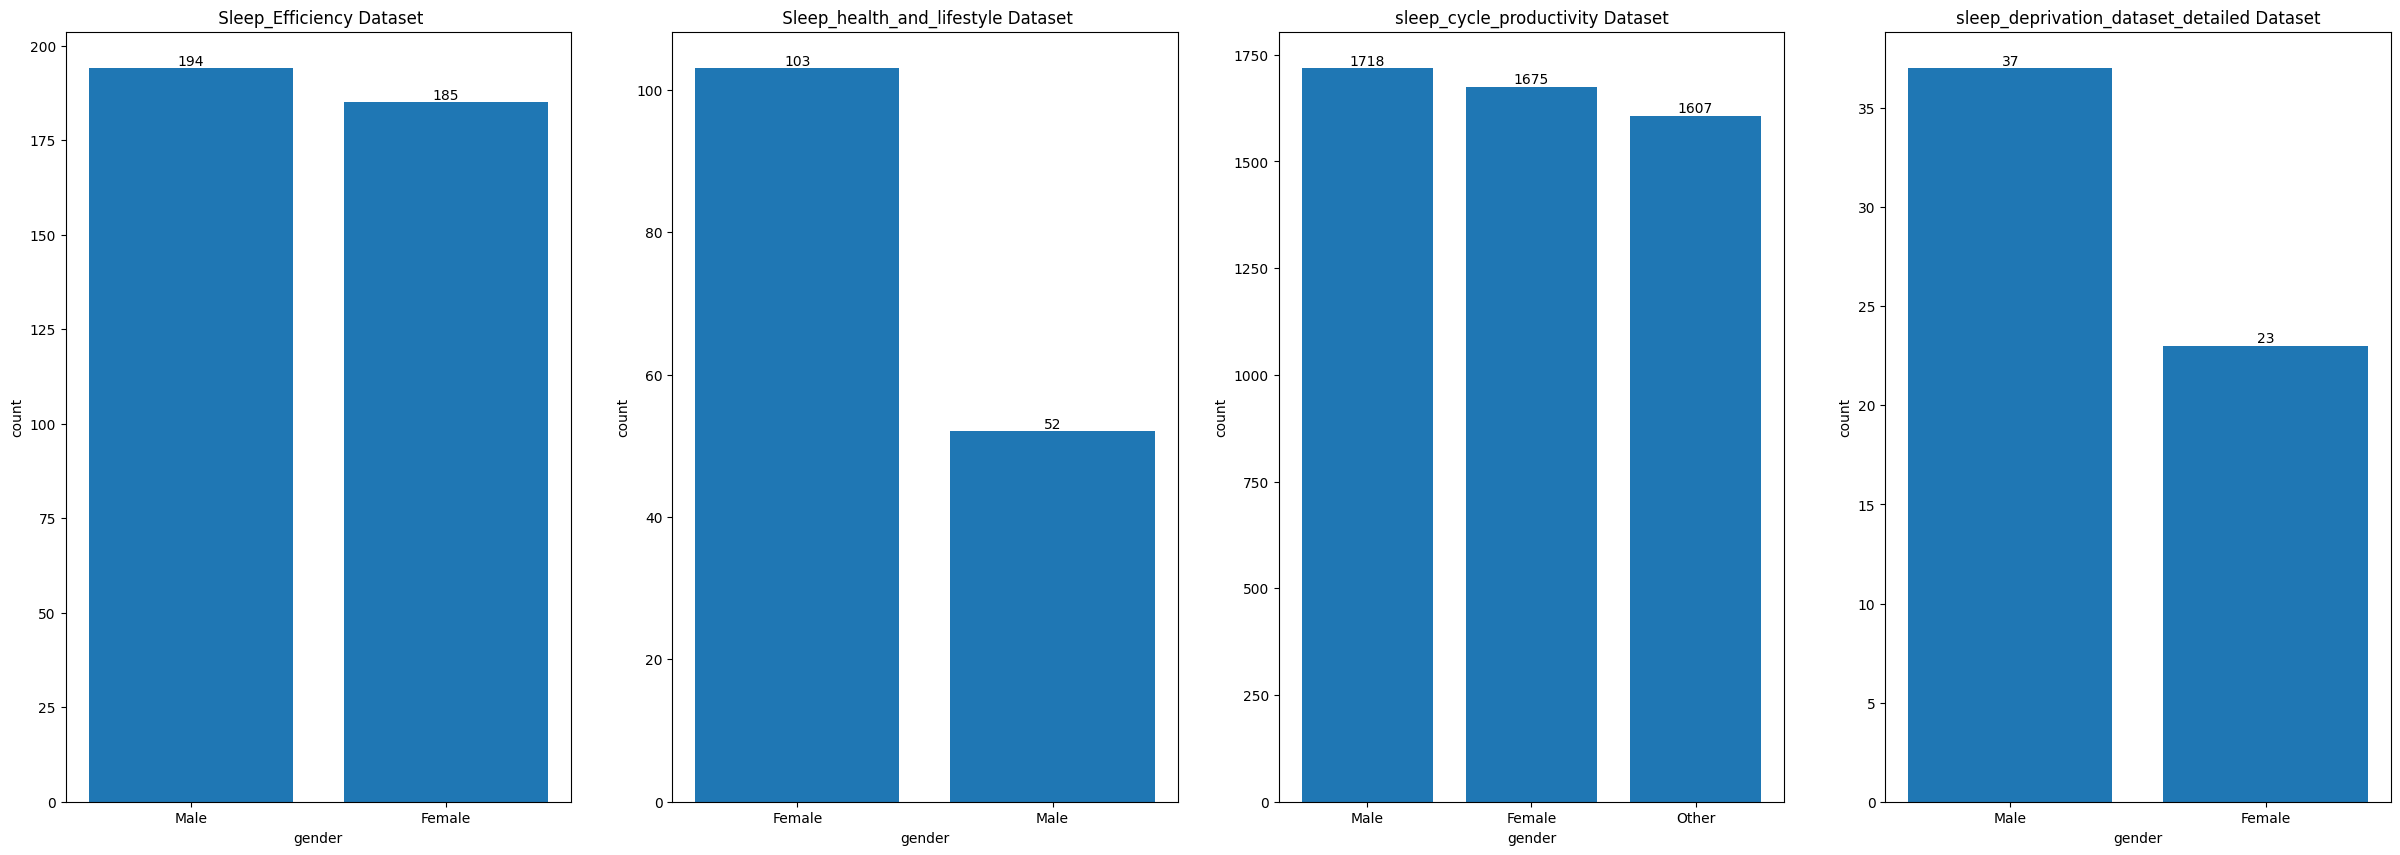

In [ ]:
# histogram of gender distribution for each dataset
fig, axs = plt.subplots(figsize=(30,10), ncols=4);
# Sleep_Efficiency.csv
gender_counts = df_eff.Gender.value_counts()
axs[0].bar(gender_counts.index, gender_counts.values)
axs[0].bar_label(axs[0].containers[0], label_type='edge')
axs[0].set(
  xlabel='gender',
  ylabel='count',
  title=' Sleep_Efficiency Dataset'
)
# Sleep_health_and_lifestyle_dataset.csv
gender_counts_health = df_health.Gender.value_counts()
axs[1].bar(gender_counts_health.index, gender_counts_health.values)
axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].set(
  xlabel='gender',
  ylabel='count',
  title=' Sleep_health_and_lifestyle Dataset'
)
# sleep_cycle_productivity.csv
gender_counts_cycle = df_cycle.Gender.value_counts()
axs[2].bar(gender_counts_cycle.index, gender_counts_cycle.values)
axs[2].bar_label(axs[2].containers[0], label_type='edge')
axs[2].set(
  xlabel='gender',
  ylabel='count',
  title='sleep_cycle_productivity Dataset'
)
# sleep_deprivation_dataset_detailed.csv
gender_counts_depr = df_depr.Gender.value_counts()
axs[3].bar(gender_counts_depr.index, gender_counts_depr.values)
axs[3].bar_label(axs[3].containers[0], label_type='edge')
axs[3].set(
  xlabel='gender',
  ylabel='count',
  title='sleep_deprivation_dataset_detailed Dataset'
)

## Histogram of sleep for each age group

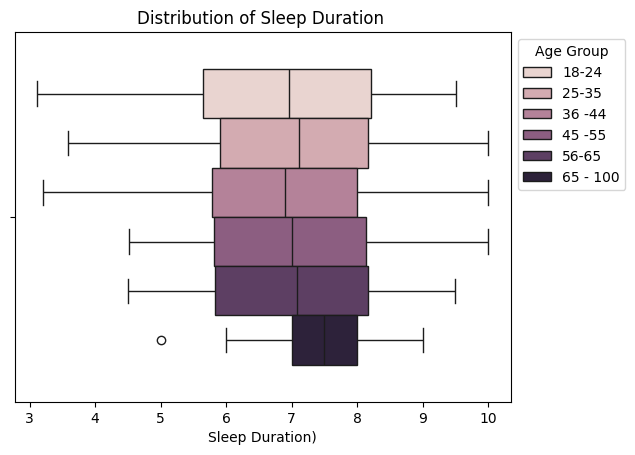

In [27]:
# histogram of sleep for each age group
sns.boxplot(data=df_age, x='Sleep Duration', hue='Age Group')
plt.xlabel('Sleep Duration)')
# plt.ylabel('Sleep Duration (Hours)')
plt.title('Distribution of Sleep Duration ')
plt.legend(['18-24','25-35','36 -44','45 -55','56-65','65 - 100'], title='Age Group',loc='upper left', bbox_to_anchor=(1, 1));
plt.show()

# Dataset : Sleep Cycle Productivity
used this one because 5000 people in this dataset

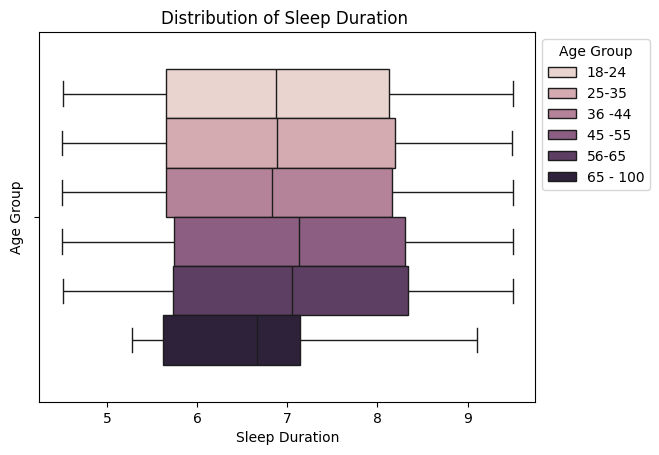

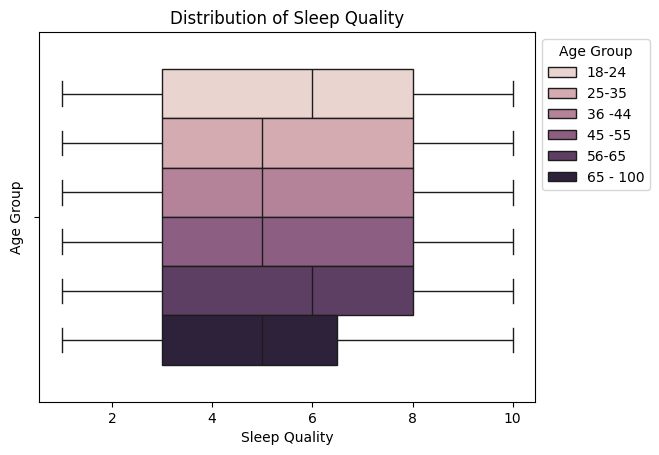

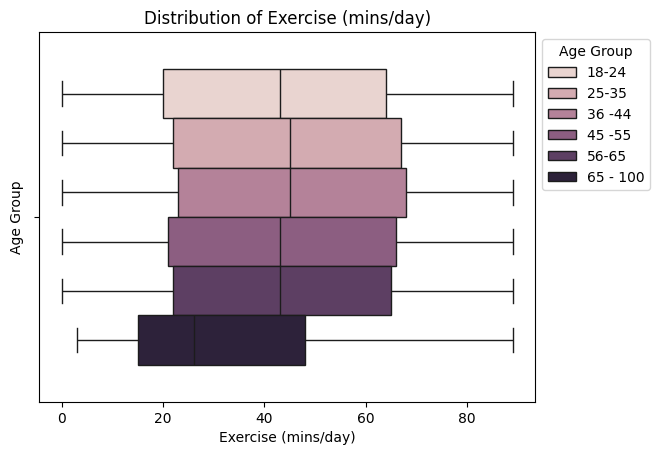

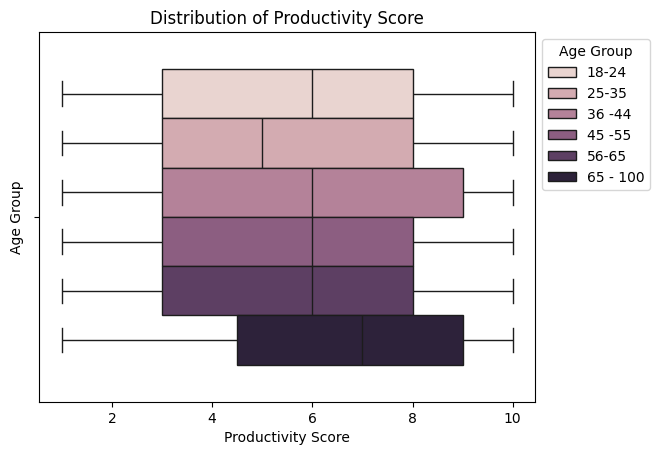

In [43]:
# make a column for age groups
# 0 = 18-24
# 1 = 25-35
# 2 = 36-44
# 3 = 45-55
# 4 = 56-64
# 5 = 65 - 100
age_groups = []
for i in range(len(df_cycle)):
  if df_age['Age'][i] >= 18 and df_age['Age'][i] <= 24:
    age_groups.append(0)
  elif df_age['Age'][i] >= 25 and df_age['Age'][i] <= 35:
    age_groups.append(1)
  elif df_age['Age'][i] >= 36 and df_age['Age'][i] <= 44:
   age_groups.append(2)
  elif df_age['Age'][i] >= 45 and df_age['Age'][i] <= 55:
   age_groups.append(3)
  elif  df_age['Age'][i] >= 56 and df_age['Age'][i] <= 64:
   age_groups.append(4)
  else:
   age_groups.append(5)

#new column : Age Group
df_cycle['Age Group'] = age_groups
column_names = df_cycle.columns
# print(column_names)

# fig, axs = plt.subplots(figsize=(30,10), ncols=3);
# will fix to make it multiple plots

# Distribution of Sleep Duration for each Age Group
sns.boxplot(data=df_cycle, x='Total Sleep Hours', hue='Age Group')
plt.xlabel('Sleep Duration')
plt.ylabel('Age Group')
plt.title('Distribution of Sleep Duration ')
plt.legend(['18-24','25-35','36 -44','45 -55','56-65','65 - 100'], title='Age Group',loc='upper left', bbox_to_anchor=(1, 1));
plt.show()
# Distribution of Sleep Quality for each Age Group
sns.boxplot(data=df_cycle, x='Sleep Quality', hue='Age Group')
plt.xlabel('Sleep Quality')
plt.ylabel('Age Group')
plt.title('Distribution of Sleep Quality')
plt.legend(['18-24','25-35','36 -44','45 -55','56-65','65 - 100'], title='Age Group',loc='upper left', bbox_to_anchor=(1, 1));
plt.show()
# Distribution of Exercise  for each Age Group
sns.boxplot(data=df_cycle, x='Exercise (mins/day)', hue='Age Group')
plt.xlabel('Exercise (mins/day)')
plt.ylabel('Age Group')
plt.title('Distribution of Exercise (mins/day)')
plt.legend(['18-24','25-35','36 -44','45 -55','56-65','65 - 100'], title='Age Group',loc='upper left', bbox_to_anchor=(1, 1));
plt.show()
# Distribution of Productivity for each Age Group
sns.boxplot(data=df_cycle, x='Productivity Score', hue='Age Group')
plt.xlabel('Productivity Score')
plt.ylabel('Age Group')
plt.title('Distribution of Productivity Score')
plt.legend(['18-24','25-35','36 -44','45 -55','56-65','65 - 100'], title='Age Group',loc='upper left', bbox_to_anchor=(1, 1));
plt.show()

# Caffeine Dataset

In [ ]:
display(df_eff.head(3))
display(df_cycle.head(3))

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Age Group
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6,5
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7,5
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10,2


In [ ]:
#caffeine dataset: sleep efficiency, sleep cycle

#merge age, gender, sleep hours
age1 = df_eff['Age'].tolist()
age3 = df_cycle['Age'].tolist()

caffeine_data = age1 + age3
caffeine_data = {'Age':caffeine_data}
df_caffeine = pd.DataFrame(caffeine_data)

print(len(df_caffeine))
# print(df_caffeine)

# add gender to all the df_age
gender1 = df_eff['Gender'].tolist()
gender3 = df_cycle['Gender'].tolist()

caffeine_data = gender1 + gender3
df_caffeine['Gender'] = caffeine_data

#convert categorical gender to numeric
df_caffeine['Gender'] = df_caffeine['Gender'].map({'Female':0, 'Male':1})
# print(df_caffeine)

# add sleep duration
duration1 = df_eff['Sleep duration'].tolist()
duration3 = df_cycle['Total Sleep Hours'].tolist()
caffeine_data = duration1 + duration3
df_caffeine['Sleep Duration'] = caffeine_data

#add caffeine intake column
caffeine1 = df_eff['Caffeine consumption'].tolist()
caffeine2 = df_cycle['Caffeine Intake (mg)'].tolist()
caffeine_data = caffeine1 + caffeine2
df_caffeine['Caffeine'] = caffeine_data

df_caffeine.dropna(inplace=True)

print(df_caffeine.columns)
print(df_caffeine)

5379
Index(['Age', 'Gender', 'Sleep Duration', 'Caffeine'], dtype='object')
      Age  Gender  Sleep Duration  Caffeine
0      65     0.0            6.00       0.0
1      69     1.0            7.00       0.0
2      40     0.0            8.00       0.0
3      40     0.0            6.00      50.0
4      57     1.0            8.00       0.0
...   ...     ...             ...       ...
5372   28     1.0            8.02     292.0
5374   38     0.0            5.37     216.0
5375   55     1.0            7.91      81.0
5376   44     0.0            4.80      90.0
5378   58     1.0            4.65      26.0

[3772 rows x 4 columns]


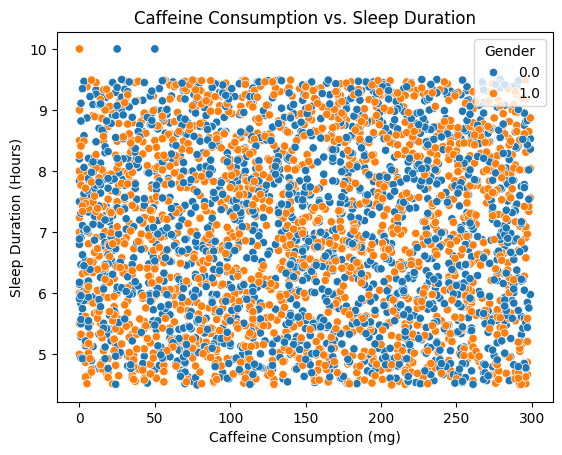

In [ ]:
#scatterplot for How Caffeine Consumption impacts Sleep Duration by Gender
#Very unclear and hard to extract info bc theres way too many data points

sns.scatterplot(data=df_caffeine, x='Caffeine', y='Sleep Duration', hue='Gender')
plt.xlabel('Caffeine Consumption (mg)')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Caffeine Consumption vs. Sleep Duration')
plt.show()

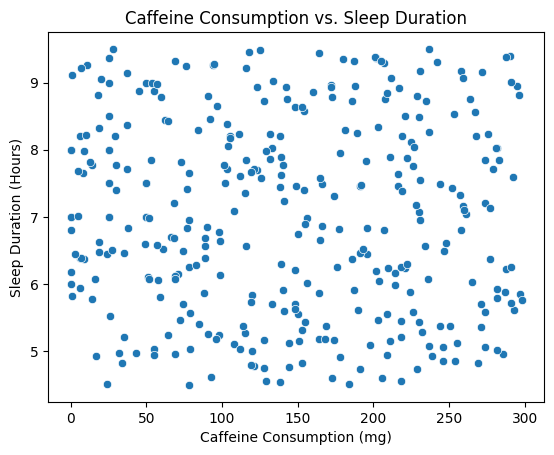

In [ ]:
#just for females ages 18-25
df_youngfemale = df_caffeine[(df_caffeine['Gender'] == 0.0 ) & (df_caffeine['Age'] >= 18) & (df_caffeine['Age'] <= 25)]
#drop null values
df_youngfemale = df_youngfemale.dropna()
# print(df_youngfemale)

sns.scatterplot(data=df_youngfemale, x='Caffeine', y='Sleep Duration')
plt.xlabel('Caffeine Consumption (mg)')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Caffeine Consumption vs. Sleep Duration')
plt.show()

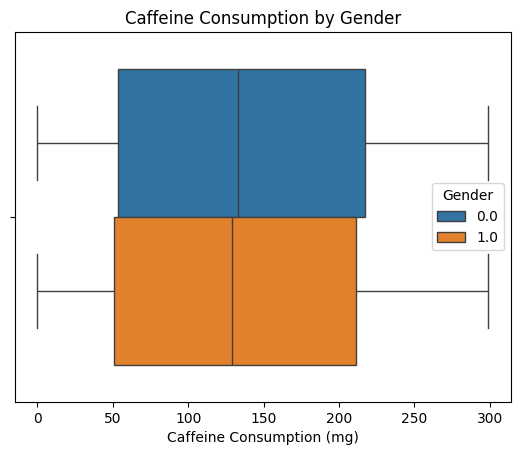

In [ ]:
#Box plot for Caffeine Consumption by Gender

sns.boxplot(data=df_caffeine, x='Caffeine', hue='Gender')
plt.xlabel('Caffeine Consumption (mg)')
plt.title('Caffeine Consumption by Gender')
plt.show()

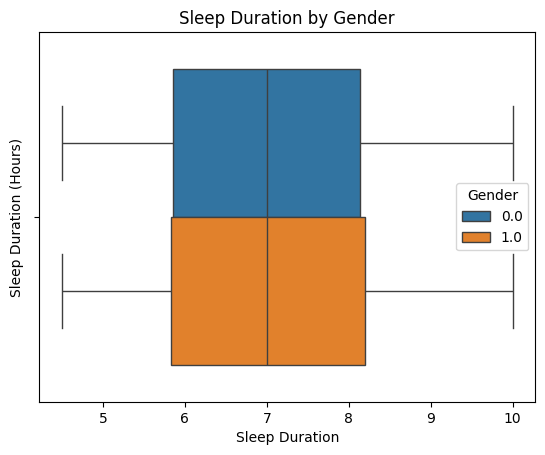

In [ ]:
#Box plot for Caffeine Consumption by Gender
sns.boxplot(data=df_caffeine, x='Sleep Duration', hue='Gender')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Sleep Duration by Gender')
plt.show()

Conclusion: Gender is not a good separator for caffeine and sleep duration

# Occupation and Sleep Duration


In [ ]:
#Top 5 occupations from Sleep Health and Lifestyle Dataset

top_5_occupations = df_health['Occupation'].value_counts().head(5)
print(top_5_occupations)
print()

#total occupation counts
occupation_counts = df_health['Occupation'].value_counts()
top_5_occupations = occupation_counts.head(5)
print(occupation_counts)


Occupation
Nurse          64
Teacher        31
Salesperson    30
Doctor          7
Accountant      7
Name: count, dtype: int64

Occupation
Nurse                   64
Teacher                 31
Salesperson             30
Doctor                   7
Accountant               7
Engineer                 6
Lawyer                   5
Sales Representative     2
Scientist                2
Software Engineer        1
Name: count, dtype: int64


<ipython-input-24-a99c244dec60>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sleep.index, y=avg_sleep.values, palette='pastel')


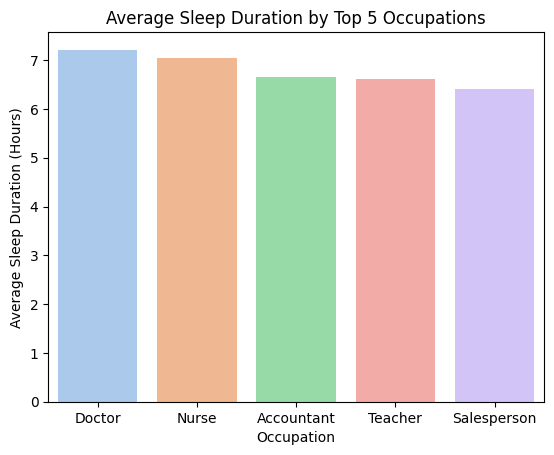

In [ ]:
#graph the sleep duration of the top 5 occupations
top_occupations = df_health['Occupation'].value_counts().head(5).index.tolist()

#Filter data
df_top_occupations = df_health[df_health['Occupation'].isin(top_occupations)]

#Create bar plot of average sleep duration
avg_sleep = df_top_occupations.groupby('Occupation')['Sleep Duration'].mean().sort_values(ascending=False)

sns.barplot(x=avg_sleep.index, y=avg_sleep.values, palette='pastel')

plt.title('Average Sleep Duration by Top 5 Occupations')
plt.ylabel('Average Sleep Duration (Hours)')
plt.xlabel('Occupation')
plt.show()


<ipython-input-25-6e6546961db6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_occupations, x='Occupation', y='Sleep Duration', palette='pastel')


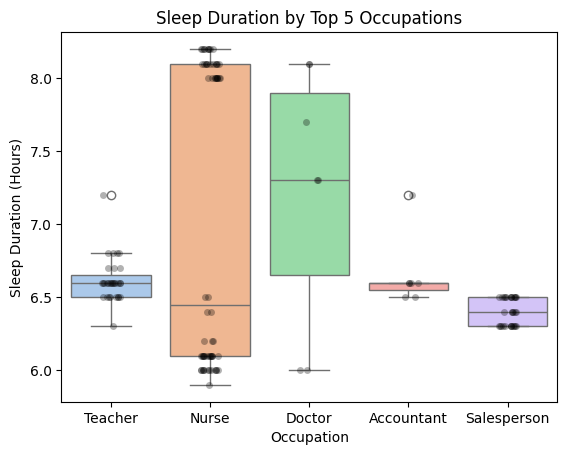

In [ ]:
#boxplot for top 5 occupations and sleep duration

sns.boxplot(data=df_top_occupations, x='Occupation', y='Sleep Duration', palette='pastel')
sns.stripplot(data=df_top_occupations, x='Occupation', y='Sleep Duration', color='black', alpha=0.3)

plt.title('Sleep Duration by Top 5 Occupations')
plt.ylabel('Sleep Duration (Hours)')
plt.xlabel('Occupation')

plt.show()

Conclusions:



Within the top 5 occupations of: teacher, nurse, doctor, accountant, and salesperons

*   Salespersons and nurses experience the least sleep duration based on median sleep duration
*   Following that, teachers and accountants, and then doctors have the highest median of sleep duration
*   Nurses have the highest range of sleep duration, from ~6.2 hours - ~8.1 hours




# Exploring relationships between BMI Category, Sleep Duration, and Sleep Disorders

In [ ]:
#looking at df_health
display(df_health.head(5))

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


In [ ]:
#list all the unique values from the columns Sleep Disorder and BMI Category in df_health
print(df_health['Sleep Disorder'].unique())
print(df_health['BMI Category'].unique())

['Sleep Apnea' 'Insomnia']
['Obese' 'Normal Weight' 'Normal' 'Overweight']


In [ ]:
#counting how many there are of each unique value
disorder_counts = df_health['Sleep Disorder'].value_counts()
print(disorder_counts)

print()
bmi_counts = df_health['BMI Category'].value_counts()
print(bmi_counts)

#dropping Normal Weight since it is repetitive and such a low count
df_health = df_health.drop(df_health[df_health['BMI Category'] == 'Normal Weight'].index)

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

BMI Category
Overweight       129
Normal            12
Obese             10
Normal Weight      4
Name: count, dtype: int64


<ipython-input-29-d4f31eb8bb6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_health, x='BMI Category', y='Sleep Duration', palette='pastel')


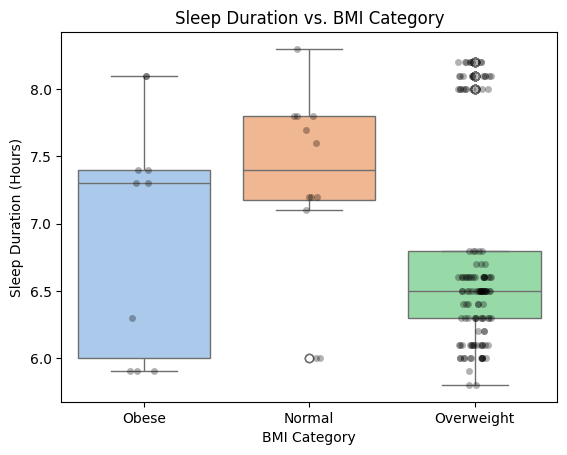

In [ ]:
#boxplot to display relationship between BMI Category and Sleep Duration
sns.boxplot(data=df_health, x='BMI Category', y='Sleep Duration', palette='pastel')
sns.stripplot(data=df_health, x='BMI Category', y='Sleep Duration', color='black', alpha=0.3)
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Sleep Duration vs. BMI Category')
plt.show()

Conclusions:

*   Those with a normal BMI and obese BMI have similar medians for sleep duration, but those with normal BMIs have a much smaller range of about 7.3-7.6 hours. The range for sleep duration of obese BMI is about 6.0-7.4 hours of sleep.
*   For the overweight BMI, the median sleep duration for this group is 6.5, and the range is 6.4-6.6 hours of sleep. However, this group also has many outliers that indicate there are a few overweight people that get around 8 hours of sleep.



<ipython-input-30-9ee67123ca51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_health, x='Sleep Disorder', y='Sleep Duration', palette = 'pastel')


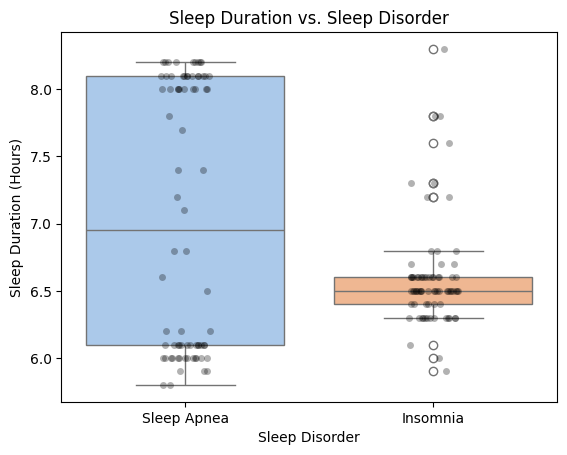

In [ ]:
#boxplot to display relationship between Sleep Disorder and Sleep Duration
sns.boxplot(data=df_health, x='Sleep Disorder', y='Sleep Duration', palette = 'pastel')
sns.stripplot(data=df_health, x='Sleep Disorder', y='Sleep Duration', color='black', alpha=0.3)
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (Hours)')
plt.title('Sleep Duration vs. Sleep Disorder')
plt.show()

Conclusion:

*   As expected, those with insomnia sleep much less than those with sleep apnea. The insomnia group's median sleep duration is 6.5, and the sleep duration ranges from 6.4-6.6 hours of sleep. There are many outliers with this group, however, with many people sleeping more than these values and many sleeping even less.
*   The sleep apnea group's median sleep duration is 6.9 hours, but the range is very large from 6.1-8.1 hours of sleep. So, it seems like sleep duration might be independent of sleep apnea.



# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# change columns - delete date, person id, age
# one-hot encoding of gender
print(df_cycle.head(5))

         Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
0  2024-04-12       1860   32   Other             23.33            4.61   
1  2024-11-04       1769   41  Female             21.02            2.43   
2  2024-08-31       2528   20    Male             22.10            3.45   
3  2024-02-22       8041   37   Other             23.10            6.65   
4  2024-02-23       4843   46   Other             21.42            4.17   

   Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
0               5.28              3                   86   
1               5.41              5                   32   
2               5.35              7                   17   
3               7.55              8                   46   
4               6.75             10                   61   

   Caffeine Intake (mg)  Screen Time Before Bed (mins)  Work Hours (hrs/day)  \
0                    87                            116              8.808920   
1                    21     

In [ ]:
#still working on this
# X = df_cycle.iloc[:, 1:-1]   # all the rows, all columns except the last one
# y = df_cycle.iloc[:, -1].astype(int)    # just the last column with class labels
# pca_X = PCA(n_components=2).fit_transform(X)

# fig, ax = plt.subplots(figsize=(12, 8));
# plot_mnist_scatter(data=pca_X, c=y, name='PCA');
# ax.set(
#     xlabel='PCA_1',
#     ylabel='PCA_2',
# );